In [ ]:
import importlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import helpers
importlib.reload(helpers)

# First Filter (Useless Feautures)

In [110]:
fields_to_drop = ["_STATE","FMONTH","IDATE","IMONTH",
    "IDAY","IYEAR","DISPCODE","SEQNO","_PSU",
    "CTELENUM","PVTRESD1","STATERES","CELLFON3",
    "LADULT","NUMADULT","NUMMEN","NUMWOMEN",
    "CTELNUM1","CELLFON2","CADULT","PVTRESD2",
    "CSTATE","LANDLINE","HHADULT","HLTHPLN1",
    "MARITAL","EDUCA","RENTHOM1","NUMHHOL2",
    "NUMPHON2","CPDEMO1","VETERAN3","EMPLOY1",
    "CHILDREN","INCOME2","INTERNET","MEDCOST",
    "USEEQUIP","BLIND","DECIDE", "DIFFWALK",
    "DIFFDRES","DIFFALON","SEATBELT", "IMFVPLAC", 
    "CAREGIV1","CRGVREL1","CRGVLNG1","CRGVHRS1",
    "CRGVPRB1","CRGVPERS","CRGVHOUS","CRGVEXPT",
    "VINOCRE2","VIINSUR2","CDHELP","SXORIENT", 
    "TRNSGNDR","RCSGENDR", "RCSRLTN2", "QSTVER",
    "QSTLANG","MSCODE",'_STSTR','_STRWT',
    '_RAWRAKE','_WT2RAKE','_CHISPNC','_DUALUSE',
    '_DUALCOR','_LLCPWT','_HCVU651','_DRDXAR1',
    '_PRACE1','_MRACE1','_HISPANC','_RACE',
    '_RACEG21','_RACEGR3','_RACE_G1','_CHLDCNT',
    '_EDUCAG','_INCOMG','_RFSEAT2','_RFSEAT3']


# Load dataset

In [111]:
train_dict, test_dict, y_train, train_ids, test_ids = helpers.load_csv_data('data/dataset')

# Remove feautures with >70% missing values

In [112]:
train_dict, test_dict = helpers.filter_features_by_nan(train_dict,test_dict,threshold=70)

Keeping 200 features


# Drop "fields_to drop"

In [113]:
train_clean, test_clean= helpers.drop_and_keep_features(train_dict, test_dict, fields_to_drop)

In [114]:
len(train_clean)

130

# Dictionary with feautures where 7, 9 etc with "refused" or "don't know" answers

In [115]:
invalid_dict = {
    (7,9): ['GENHLTH','PERSDOC2','CHECKUP1',
            'BPHIGH4','BPMEDS','BLOODCHO',
            'CHOLCHK','TOLDHI2','CVDSTRK3',
            'ASTHMA3','CHCSCNCR','CHCOCNCR',
            'CHCCOPD1','HAVARTH3','ADDEPEV2',
            'CHCKIDNY','DIABETE3','QLACTLM2',
            'SMOKE100','SMOKDAY2','USENOW3',
            'EXERANY2','CHOLCHK','DRNKANY5',
            '_RFBMI5','_CHOLCHK','_RFSMOK3',
            'PAMISS1_','PNEUVAC3','FLUSHOT6'],
    (77,99): ['PHYSHLTH','MENTHLTH','POORHLTH',
              'DRNK3GE5','MAXDRNKS','AVEDRNK2',
              'EXRACT11'],
    (777,999): ['ALCDAY5','FRUITJU1','FRUIT1',
                'FVBEANS','FVGREEN','FVORANG',
                'VEGETAB1','EXEROFT1','EXERHMM1','MAXVO2_',
                'FC60_'],
    (7777,9999): ['WEIGHT2','HEIGHT3'],
    (9): ['_VEGLT1','_TOTINDA','_PACAT1',
          '_PAINDX1','_PA150R2', '_PA300R2',
          '_PA30021', '_PASTRNG', '_PAREC1',
          '_PASTAE1', '_FLSHOT6', '_LMTACT1',
          '_LMTWRK1','_LMTSCL1','_PNEUMO2',
          '_AIDTST3', '_RFHLTH','_RFHYPE5',
          '_LTASTH1','_CASTHM1', '_ASTHMS1',
          '_SMOKER3','_RFBING5','_RFDRHV5',
          '_FRTLT1','_RFCHOL'],
    (99): ['PAFREQ1_', 'PAFREQ2_', 'STRFREQ_'],

    (99900): ['_DRNKWEK'],
    (14): ['_AGEG5YR'],
    (99999): ['WTKG3'],
    (900): ['DROCDY3','DROCDY3_'],
    (3): ['_AGE65YR']

    
}

# Replace 7,9 etc with nans

In [116]:
helpers.replace_invalid_with_nan_inplace([train_clean,test_clean], invalid_dict)

## Drop them

In [119]:
train_clean, test_clean = helpers.filter_features_by_nan(train_clean,test_clean,threshold=30)

Keeping 95 features


In [ ]:
new_to_drop = [
'PHYSHLTH', 'MENTHLTH', 'BPHIGH4',
'_CHOLCHK', 'BLOODCHO', 'CHOLCHK',
'TOLDHI2', '_CASTHM1', '_LTASTH1',
'ASTHMA3', 'HIVTST6', '_AGE80',
'_AGE_G', '_LMTSCL1' , 'WEIGHT2',
'HEIGHT3','HTIN4','HTM4','WTKG3',
'_BMI5','_RFBMI5','QLACTLM2',
'EXERANY2','STRENGTH','_TOTINDA',
'STRFREQ_','PAMISS1_', '_PA150R2',
'_PA300R2','_PA30021','_PASTRNG',
'_PASTAE1','_LMTWRK1', 'SMOKE100',
'USENOW3','_RFSMOK3','ALCDAY5',
'DRNKANY5', 'DROCDY3_','_RFDRHV5',
'_MISFRTN','_MISVEGN',
 '_FRTRESP', '_VEGRESP','_FRUITEX','_VEGETEX',
 'GENHLTH', 'FRUITJU1', 'FRUIT1', 'FVBEANS',
 'FVGREEN', 'FVORANG','VEGETAB1',
 '_FRUTSUM','_VEGESUM','_FRT16','_VEG23',
 '_VEGLT1','_FRTLT1','_AGE65YR', 'VEGEDA1_',
 #'_DRNKWEK', 'FTJUDA1_', 'FRUTDA1_','BEANDAY_',
 #'GRENDAY_', 'ORNGDAY_', 'MAXVO2_',
]

In [230]:
train_clean, test_clean = helpers.drop_and_keep_features(train_clean, test_clean, new_to_drop)

In [231]:
len(train_clean)

27

In [ ]:
import pandas as pd
# Convert to DataFrame
df = pd.DataFrame(train_clean)

# Drop rows with NaNs (like in your example)
#df_clean = df.dropna()
df['y'] = pd.Series(y_train)

# separate y=1, y=-1

In [236]:
mask_pos = (y_train == 1)
mask_neg = (y_train == -1)

# split features
features_pos = {k: v[mask_pos] for k, v in train_clean.items()}
features_neg = {k: v[mask_neg] for k, v in train_clean.items()}

# split targets
y_pos = y_train[mask_pos]
y_neg = y_train[mask_neg]


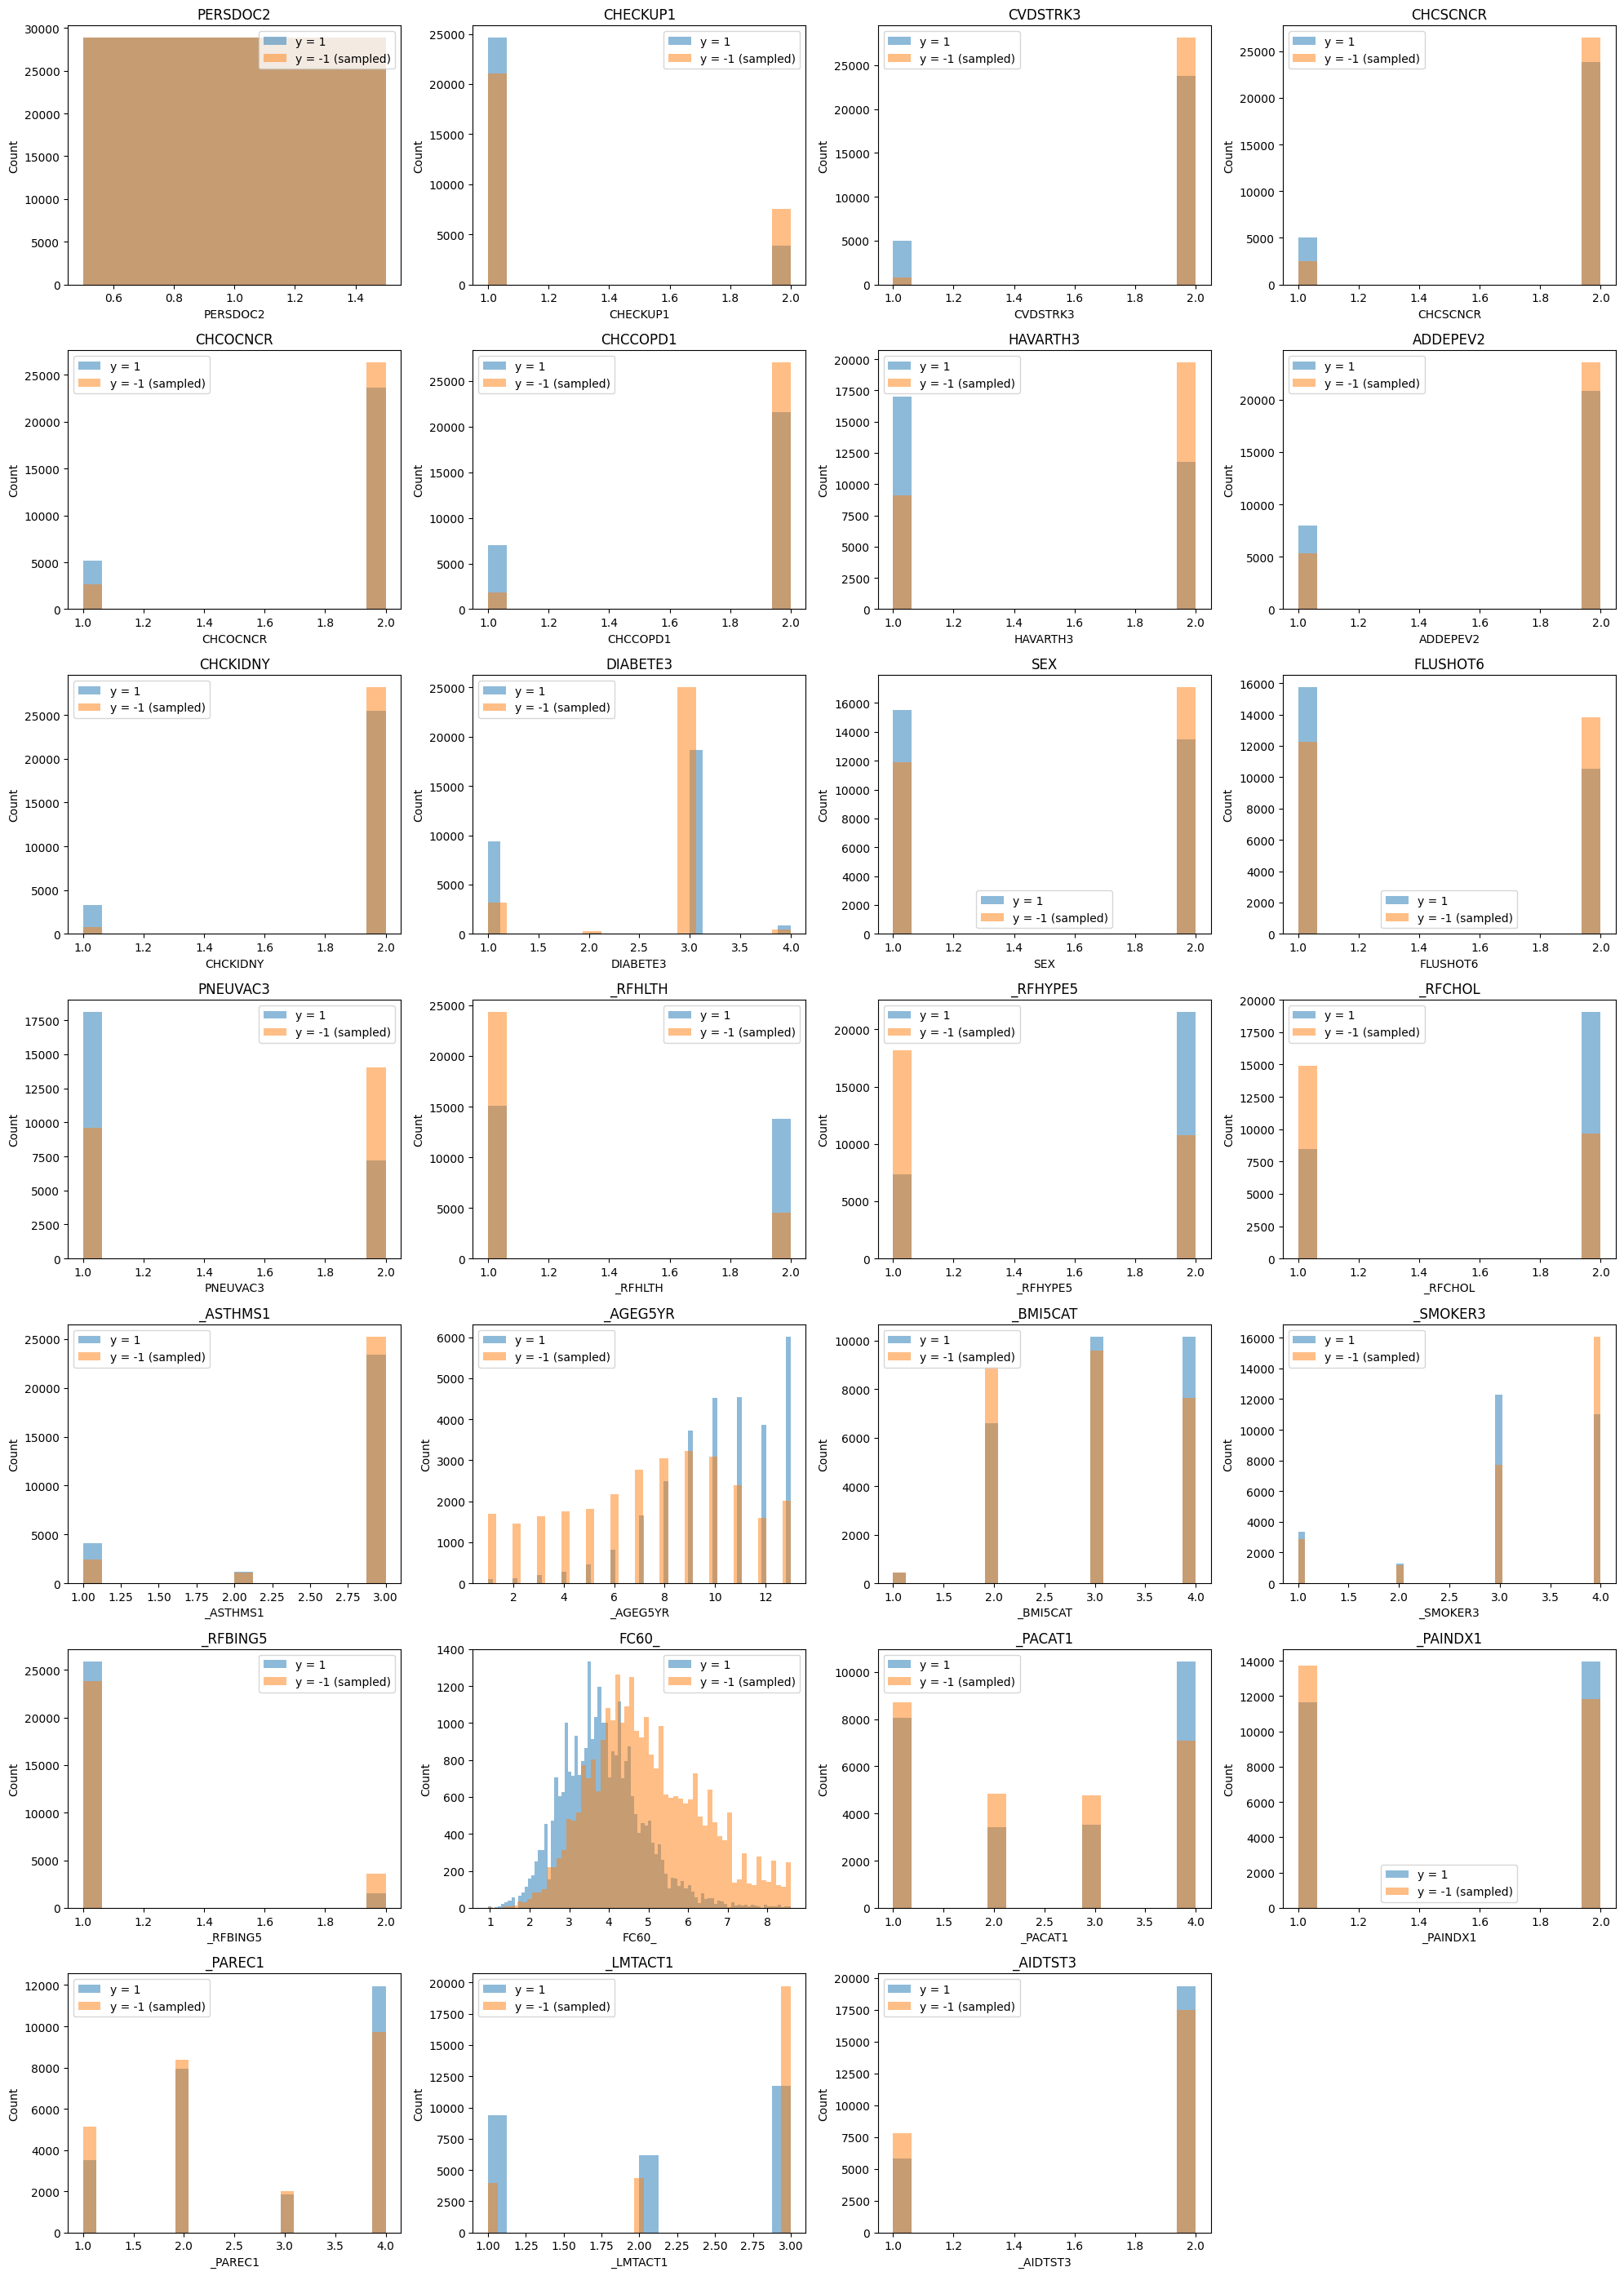

In [238]:
helpers.distribution_plotter(y_train,train_clean)

In [239]:
continuous_feautures = ['_DRNKWEK', 'FTJUDA1_', 'FRUTDA1_', 'BEANDAY_', 'GRENDAY_', 'ORNGDAY_','MAXVO2_', 'FC60_']

In [241]:
# First condition: values 1 or 2 → set to 1
train_clean['PERSDOC2'][np.where((train_clean['PERSDOC2'] == 1) | (train_clean['PERSDOC2'] == 2))] = 1

# Second condition: values 3 → set to 2
train_clean['PERSDOC2'][np.where(train_clean['PERSDOC2'] == 3)] = 2

train_clean['CHECKUP1'][np.where(
    (train_clean['CHECKUP1'] == 2) | 
    (train_clean['CHECKUP1'] == 3) | 
    (train_clean['CHECKUP1'] == 4) | 
    (train_clean['CHECKUP1'] == 8)
)] = 2

# Training

In [ ]:
X_train = np.column_stack(list(train_clean.values()))
mask = ~np.isnan(X_train).any(axis=1)  # rows without NaN
X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

In [ ]:
helpers.cross_validation(
    y_train_clean,
    X_train_clean,
    k_fold=5,
    method='undersample',    # ← use weighted instead of undersample
    lambda_=0.01,
    max_iters=2000,
    gamma=0.1,
    proba=0.45)
## y, x, k_fold, method, lambda_, max_iters, gamma

Fold 1/5 → test loss: 0.2865, train loss:1.1591 prec: 0.406, rec: 0.329, acc: 0.885
Fold 2/5 → test loss: 0.2852, train loss:1.1524 prec: 0.398, rec: 0.323, acc: 0.884
Fold 3/5 → test loss: 0.2863, train loss:1.1400 prec: 0.402, rec: 0.332, acc: 0.884
Fold 4/5 → test loss: 0.2808, train loss:1.1812 prec: 0.420, rec: 0.322, acc: 0.888
Fold 5/5 → test loss: 0.2840, train loss:1.1441 prec: 0.405, rec: 0.333, acc: 0.885

=== Cross-Validation Summary ===
Avg train loss: 1.1554
Avg test loss: 0.2846
Avg precision: 0.406
Avg recall:    0.328
Avg accuracy:  0.885


{'test_loss': np.float64(0.28456106266346987),
 'precision': np.float64(0.4060660106934682),
 'recall': np.float64(0.32775655738084125),
 'accuracy': np.float64(0.8851644674047915)}

# Shit

In [517]:
df = pd.DataFrame(train_clean)
df['y'] = y_train

In [412]:
df.head()

,PERSDOC2,CHECKUP1,CVDSTRK3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,...,ORNGDAY_,VEGEDA1_,MAXVO2_,FC60_,_PACAT1,_PAINDX1,_PAREC1,_LMTACT1,_AIDTST3,y
0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,...,0.27,0.71,26.91,4.61,2.0,1.0,1.0,3.0,2.0,-1
1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,NaN,NaN,28.65,4.91,NaN,NaN,NaN,3.0,NaN,-1
2,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,...,0.43,1.00,23.95,4.11,3.0,2.0,4.0,2.0,2.0,-1
3,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,...,0.71,1.00,23.95,4.11,1.0,1.0,2.0,2.0,2.0,-1
4,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,0.27,0.83,NaN,NaN,NaN,NaN,NaN,3.0,2.0,-1


# Variable working (can also just take log and then afterwards remove outliers per variable y value)

## _DRNKWEK (trimmed impossible values to median). Can also try to add log to variable so that reduce skeweness and see which performs better(positively skewed variable)

In [539]:
import numpy as np

# compute median ignoring NaNs
p_95 = np.nanpercentile(df['_DRNKWEK'], 95)
lower = 100 - 95

# replace values greater than 250 with the median
train_clean['_DRNKWEK'][train_clean['_DRNKWEK'] > 250] = p_95


In [540]:
np.nanpercentile(df['_DRNKWEK'], lower)

np.float64(0.0)

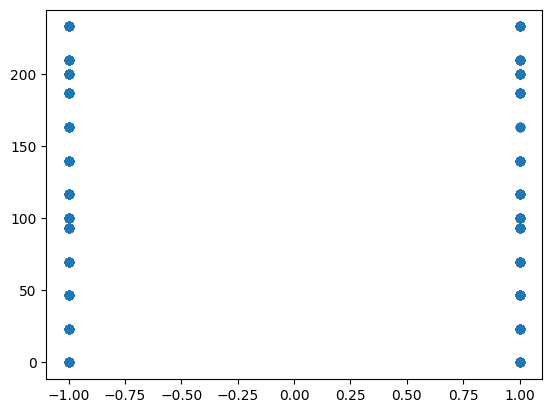

In [425]:
plt.scatter(df['y'], df['_DRNKWEK'], alpha=0.1)
plt.show()

In [431]:
print("Log(1+x) skewness:", np.log1p(df["_DRNKWEK"]).skew())
print(" skewness:", df["_DRNKWEK"].skew())

Log(1+x) skewness: 0.2660420580160751
 skewness: 2.2657620458261487


## FTJUDA1_ Can also try to add log to variable so that reduce skeweness and see which performs better(positively skewed variable)

### > 20 seems very not plausible

In [438]:
# compute median ignoring NaNs
median_val = np.nanmedian(train_clean['FTJUDA1_'])

# replace values greater than 250 with the median
train_clean['FTJUDA1_'][train_clean['FTJUDA1_'] > 20] = median_val

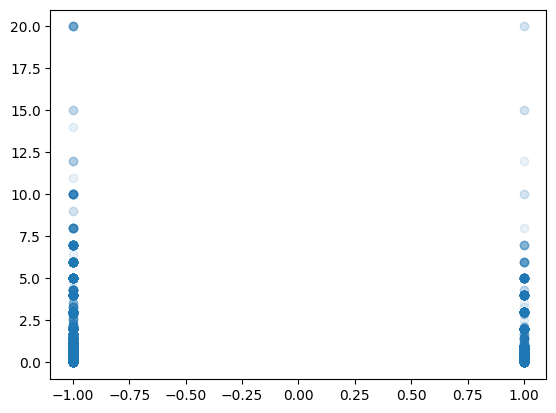

In [442]:
plt.scatter(df['y'], df['FTJUDA1_'], alpha=0.1)
plt.show()

In [443]:
print(" skewness:", df["FTJUDA1_"].skew())

 skewness: 4.931998242460201


## FRUTDA1_

### > 20 seems very not plausible

In [453]:
# compute median ignoring NaNs
median_val = np.nanmedian(train_clean['FRUTDA1_'])

# replace values greater than 250 with the median
train_clean['FRUTDA1_'][train_clean['FRUTDA1_'] > 20] = median_val

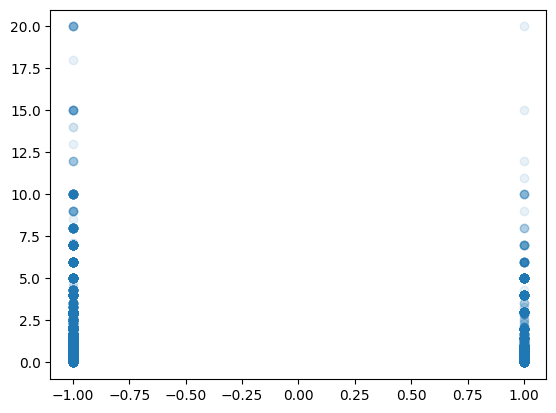

In [454]:
plt.scatter(df['y'], df['FRUTDA1_'], alpha=0.1)
plt.show()

In [455]:
print(" skewness:", df["FTJUDA1_"].skew())

 skewness: 4.931998242460201


# BEANDAY_


### > 10 seems very not plausible

In [462]:
# compute median ignoring NaNs
median_val = np.nanmedian(train_clean['BEANDAY_'])

# replace values greater than 250 with the median
train_clean['BEANDAY_'][train_clean['BEANDAY_'] > 10] = median_val

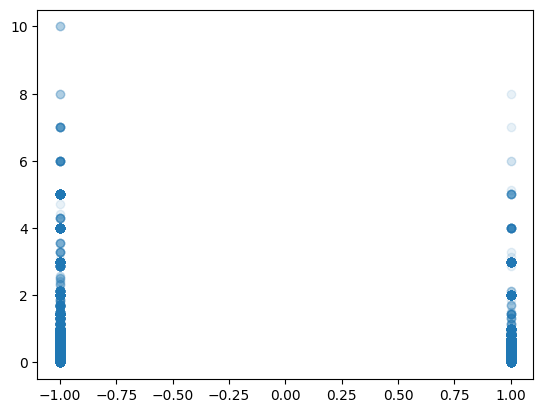

In [465]:
plt.scatter(df['y'], df['BEANDAY_'], alpha=0.1)


In [466]:
print(" skewness:", df["BEANDAY_"].skew())

 skewness: 4.7062806787759595


# GRENDAY_

### > 10 seems very not plausible

In [468]:
# compute median ignoring NaNs
median_val = np.nanmedian(train_clean['GRENDAY_'])

# replace values greater than 250 with the median
train_clean['GRENDAY_'][train_clean['GRENDAY_'] > 10] = median_val

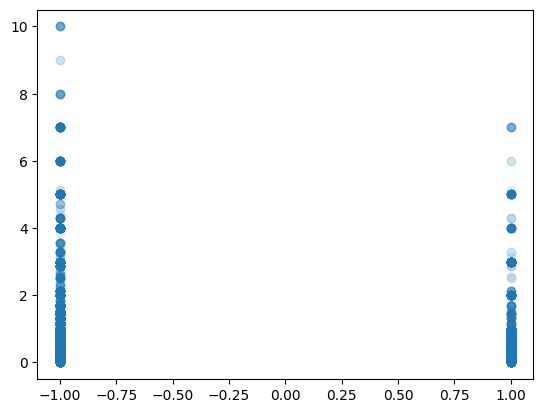

In [471]:
plt.scatter(df['y'], df['GRENDAY_'], alpha=0.1)


In [478]:
print(" skewness:", df["GRENDAY_"].skew())

 skewness: 2.9114896802584886


## ORNGDAY_

### > 10 seems very not plausible

In [474]:
median_val = np.nanmedian(train_clean['ORNGDAY_'])

# replace values greater than 250 with the median
train_clean['ORNGDAY_'][train_clean['ORNGDAY_'] > 10] = median_val

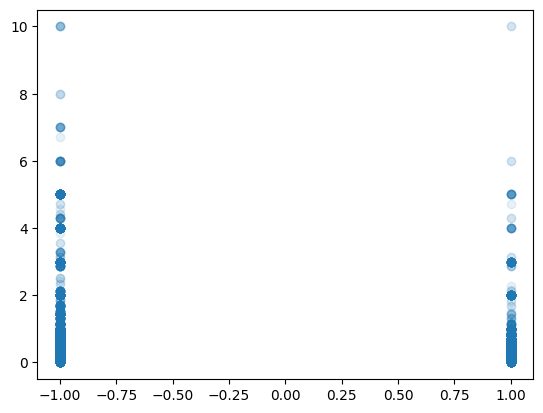

In [477]:
plt.scatter(df['y'], df['ORNGDAY_'], alpha=0.1)

In [479]:
print(" skewness:", df["ORNGDAY_"].skew())

 skewness: 4.5085569233224145


In [32]:
train_clean.values()

dict_values([array([1., 1., 1., ..., 1., 1., 1.], shape=(328135,)), array([1., 1., 1., ..., 1., 1., 1.], shape=(328135,)), array([2., 2., 2., ..., 2., 2., 2.], shape=(328135,)), array([2., 2., 2., ..., 2., 2., 2.], shape=(328135,)), array([2., 2., 2., ..., 2., 2., 2.], shape=(328135,)), array([2., 2., 2., ..., 2., 2., 2.], shape=(328135,)), array([2., 2., 1., ..., 2., 2., 1.], shape=(328135,)), array([1., 2., 2., ..., 1., 2., 2.], shape=(328135,)), array([2., 2., 2., ..., 2., 2., 2.], shape=(328135,)), array([3., 3., 3., ..., 3., 3., 3.], shape=(328135,)), array([2., 1., 2., ..., 2., 1., 2.], shape=(328135,)), array([ 1., nan,  1., ...,  2.,  1.,  2.], shape=(328135,)), array([ 2., nan,  2., ...,  2.,  2.,  2.], shape=(328135,)), array([1., 2., 1., ..., 1., 1., 1.], shape=(328135,)), array([1., 2., 1., ..., 1., 1., 2.], shape=(328135,)), array([1., 1., 2., ..., 2., 1., 1.], shape=(328135,)), array([3., 3., 3., ..., 3., 1., 3.], shape=(328135,)), array([ 8.,  8., 10., ..., 10.,  5.,  7.

In [33]:
X = np.column_stack(list(train_clean.values()))

In [ ]:
train_clean

In [34]:
X

array([[ 1.,  1.,  2., ...,  1.,  3.,  2.],
       [ 1.,  1.,  2., ..., nan,  3., nan],
       [ 1.,  1.,  2., ...,  4.,  2.,  2.],
       ...,
       [ 1.,  1.,  2., ...,  3.,  3.,  2.],
       [ 1.,  1.,  2., ...,  3.,  3.,  2.],
       [ 1.,  1.,  2., ..., nan,  2.,  2.]], shape=(328135, 34))

In [66]:
temp = pd.DataFrame(train_clean)
del temp['_AIDTST3']

In [67]:
temp.isna().sum()

PERSDOC2     1333
CHECKUP1     4446
CVDSTRK3      737
CHCSCNCR      816
CHCOCNCR      654
CHCCOPD1     1547
HAVARTH3     1883
ADDEPEV2     1450
CHCKIDNY      977
DIABETE3      479
SEX             0
FLUSHOT6    32858
PNEUVAC3    57961
_RFHLTH       888
_RFHYPE5      918
_RFCHOL     46324
_ASTHMS1     2334
_AGEG5YR     3943
_BMI5CAT    27073
_SMOKER3    13266
_RFBING5    18858
_DRNKWEK    18967
FTJUDA1_    28366
FRUTDA1_    26927
BEANDAY_    29382
GRENDAY_    27893
ORNGDAY_    28958
MAXVO2_      3943
FC60_        3943
_PACAT1     41344
_PAINDX1    39414
_PAREC1     42541
_LMTACT1    11436
dtype: int64

In [68]:
temp['y'] = y_train

In [69]:
temp[temp['y']==1]

,PERSDOC2,CHECKUP1,CVDSTRK3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,...,BEANDAY_,GRENDAY_,ORNGDAY_,MAXVO2_,FC60_,_PACAT1,_PAINDX1,_PAREC1,_LMTACT1,y
6,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,...,0.00,0.00,0.00,15.44,2.65,3.0,2.0,4.0,1.0,1
7,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,...,0.14,0.29,NaN,8.85,1.52,4.0,2.0,3.0,2.0,1
13,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,17.66,3.03,NaN,NaN,NaN,NaN,1
14,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,...,0.27,0.17,0.50,19.51,3.34,4.0,2.0,4.0,2.0,1
25,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,1.00,0.14,2.00,34.70,5.95,4.0,2.0,4.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328111,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,...,0.03,0.29,0.07,33.57,5.75,4.0,2.0,4.0,1.0,1
328112,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,...,0.14,0.07,0.14,22.84,3.92,2.0,1.0,2.0,1.0,1
328113,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,...,0.13,0.00,0.13,23.58,4.04,4.0,2.0,4.0,1.0,1
328120,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,0.00,0.67,0.33,19.85,3.40,4.0,2.0,4.0,2.0,1


In [70]:
temp[temp['y']==-1]

,PERSDOC2,CHECKUP1,CVDSTRK3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,...,BEANDAY_,GRENDAY_,ORNGDAY_,MAXVO2_,FC60_,_PACAT1,_PAINDX1,_PAREC1,_LMTACT1,y
0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,...,0.13,0.10,0.27,26.91,4.61,2.0,1.0,1.0,3.0,-1
1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,NaN,NaN,NaN,28.65,4.91,NaN,NaN,NaN,3.0,-1
2,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,...,0.43,1.00,0.43,23.95,4.11,3.0,2.0,4.0,2.0,-1
3,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,...,0.07,1.00,0.71,23.95,4.11,1.0,1.0,2.0,2.0,-1
4,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,0.50,0.13,0.27,NaN,NaN,NaN,NaN,NaN,3.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,...,0.33,0.33,0.23,28.65,4.91,2.0,1.0,2.0,3.0,-1
328131,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,1.00,1.00,0.14,29.75,5.10,1.0,1.0,1.0,3.0,-1
328132,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,...,0.00,0.07,0.14,22.84,3.92,3.0,2.0,3.0,3.0,-1
328133,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,0.03,0.17,0.03,36.35,6.23,3.0,2.0,3.0,3.0,-1


In [86]:
temp.columns

Index(['PERSDOC2', 'CHECKUP1', 'CVDSTRK3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1',
       'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'SEX', 'FLUSHOT6',
       'PNEUVAC3', '_RFHLTH', '_RFHYPE5', '_RFCHOL', '_ASTHMS1', '_AGEG5YR',
       '_BMI5CAT', '_SMOKER3', '_RFBING5', '_DRNKWEK', 'FTJUDA1_', 'FRUTDA1_',
       'BEANDAY_', 'GRENDAY_', 'ORNGDAY_', 'MAXVO2_', 'FC60_', '_PACAT1',
       '_PAINDX1', '_PAREC1', '_LMTACT1', 'y'],
      dtype='object')

In [71]:
no_na = temp.dropna()

In [72]:
no_na[no_na['y']==1]

,PERSDOC2,CHECKUP1,CVDSTRK3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,...,BEANDAY_,GRENDAY_,ORNGDAY_,MAXVO2_,FC60_,_PACAT1,_PAINDX1,_PAREC1,_LMTACT1,y
6,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,...,0.00,0.00,0.00,15.44,2.65,3.0,2.0,4.0,1.0,1
61,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,0.00,0.29,0.00,20.40,3.50,4.0,2.0,4.0,3.0,1
94,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,0.07,0.43,0.14,19.51,3.34,4.0,2.0,4.0,1.0,1
124,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,0.07,0.00,0.13,20.25,3.47,4.0,2.0,4.0,1.0,1
146,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,...,0.10,0.00,0.03,18.20,3.12,4.0,2.0,4.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328111,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,...,0.03,0.29,0.07,33.57,5.75,4.0,2.0,4.0,1.0,1
328112,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,...,0.14,0.07,0.14,22.84,3.92,2.0,1.0,2.0,1.0,1
328113,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,...,0.13,0.00,0.13,23.58,4.04,4.0,2.0,4.0,1.0,1
328120,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,0.00,0.67,0.33,19.85,3.40,4.0,2.0,4.0,2.0,1


In [78]:
df = pd.DataFrame(train_clean)
df['y'] = y_train
df['y'] = (df['y'] + 1) / 2

In [106]:
df[df['_PACAT1'] == 4]['y'].mean()*100

np.float64(12.592806865297465)

In [89]:
pd.crosstab(df['_SMOKER3'], df['_BMI5CAT'], values=df['y'], aggfunc='mean')

_BMI5CAT,1.0,2.0,3.0,4.0
_SMOKER3,,,,
1.0,0.118694,0.084956,0.109660,0.123545
2.0,0.103152,0.085845,0.100501,0.112889
3.0,0.130601,0.106466,0.137955,0.165234
4.0,0.051906,0.045221,0.064383,0.083325


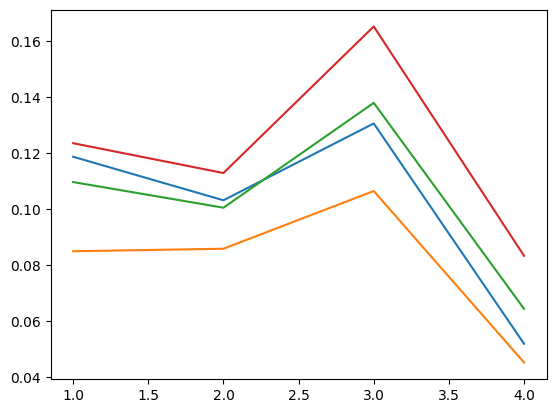

In [95]:
plt.plot(pd.crosstab(df['_SMOKER3'], df['_BMI5CAT'], values=df['y'], aggfunc='mean'))

In [88]:
pd.crosstab(df['_SMOKER3'], df['SEX'], values=df['y'], aggfunc='mean')

SEX,1.0,2.0
_SMOKER3,,
1.0,0.119590,0.089679
2.0,0.108130,0.089363
3.0,0.172818,0.098930
4.0,0.071520,0.055726


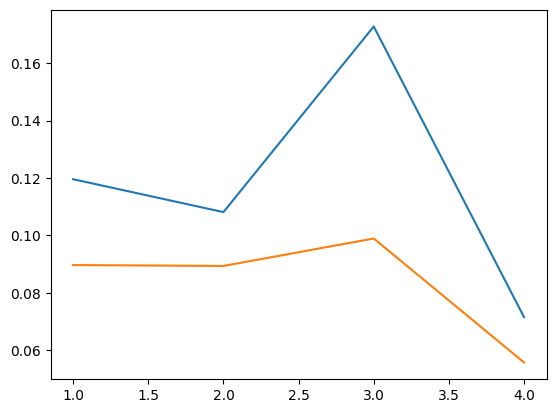

In [94]:
plt.plot(pd.crosstab(df['_SMOKER3'], df['SEX'], values=df['y'], aggfunc='mean'))

In [ ]:
pd.crosstab(df['_AGEG5YR'], df['SEX'], values=df['y'], aggfunc='mean')

SEX,1.0,2.0
_AGEG5YR,,
1.0,0.006407,0.003759
2.0,0.009247,0.007836
3.0,0.011248,0.011186
4.0,0.014924,0.014510
5.0,0.027715,0.019718
6.0,0.042888,0.031487
7.0,0.069003,0.045966
8.0,0.093469,0.056562
9.0,0.135225,0.073399


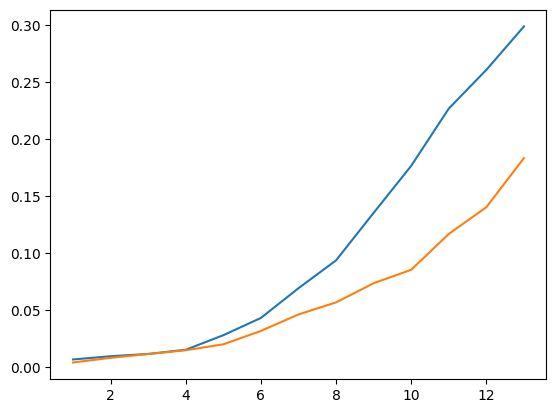

In [91]:
plt.plot(pd.crosstab(df['_AGEG5YR'], df['SEX'], values=df['y'], aggfunc='mean'))

MAXVO_
FC60_